In [116]:
import os
import json
import numpy as np
from pprint import pprint
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("dark")
import torch
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:60% !important; }</style>"))

%matplotlib inline
plt.rcParams['font.size'] = 18.0
plt.rcParams['figure.figsize'] = (16.0, 16.0)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'
%config InlineBackend.figure_format = 'retina'

In [151]:
def load_checkpoint(filename):
    try:
        ck = torch.load(filename, map_location='cpu')
    except Exception:
        return {}
    else:
        return ck
    
def get_logs_pth(dirname='weights', suffix='_checkpoint.pth.tar'):
    logs = {}
    for filename in os.listdir(dirname):
        path = os.path.join(dirname, filename)
        if path.endswith(suffix):
            ck = load_checkpoint(path)
            try:
                ck.pop('state_dict')
            except Exception:
                pass
            logs[filename] = ck
    return logs

def get_logs(dirname='logs', suffix='.json'):
    logs = {}
    for filename in os.listdir(dirname):
        path = os.path.join(dirname, filename)
        if path.endswith(suffix):
            with open(path) as f:
                logs[filename] =  json.load(f)
    return logs


def plot_logs_by_key(logs, key='val_acc1_history', suffix='_checkpoint.pth'):
    for name, log in logs.items():
        name = name.rstrip(suffix)
        top1 = log[key]
        epochs = list(range(len(top1)))
        plt.plot(epochs, top1, label=name)

    plt.legend(loc='lower right', fontsize='x-small')
    plt.xlabel('Epoch', fontsize='x-large')
    plt.ylabel('Top1 Validation Accuracy', fontsize='x-large')
    plt.title('Training History', fontsize='xx-large')
    plt.show()

def plot_logs_by_keys(logs, keys=['val_acc1_history', 'val_acc5_history'], suffix='_checkpoint.pth.tar'):
    for name, log in logs.items():
        name = name.rstrip(suffix)
        for key in keys:
            val = log[key]
            epochs = list(range(len(val)))
            plt.plot(epochs, val, label=name)

    plt.legend(loc='lower right', fontsize='x-small')
    plt.xlabel('Epoch', fontsize='x-large')
    plt.ylabel('Top1 Validation Accuracy', fontsize='x-large')
    plt.title('Training History', fontsize='xx-large')
    plt.show()

    
def smooth_data(data, amount=1.0):
    if not amount > 0.0:
        return data
    data_len = len(data)
    ksize = max(1, int(amount * (data_len // 2)))
    kernel = np.ones(ksize) / ksize    
    return np.convolve(data, kernel, mode='same')


def plot_loss_logs(logs, key='top1', suffix='.json', smoothing_amount=0.1,
                   linewidth=1):
    fig, axs = plt.subplots(2, sharex=True)
    for name, log in logs.items():
        name = name.rstrip(suffix)
        epochs = log['epoch']
        val_loss = log['val_loss']
        train_loss = log['loss']
        train_loss = smooth_data(train_loss, smoothing_amount)
        axs[0].plot(epochs, train_loss, label=name, linewidth=linewidth)

        val_loss = smooth_data(val_loss, smoothing_amount)
        axs[1].plot(epochs, val_loss, label=name, linewidth=linewidth)

    for label, ax in zip([f'Training Loss', f'Validation Loss'], axs.flat):
        ax.set(ylabel=label)

    plt.xlabel('Epoch', fontsize='x-large')
    plt.legend(loc='lower right', fontsize='x-small')
    axs[0].set_title('Training History', fontsize='xx-large')
    fig.tight_layout()
    plt.show()
    
    
def plot_logs(logs, key='top1', suffix='.json', smoothing_amount=0.1,
             linewidth=1):
    fig, axs = plt.subplots(2, sharex=True)
    for name, log in logs.items():
        name = name.rstrip(suffix)
        epochs = log['epoch']
        val_acc = log['val_acc']
        train_acc = log['acc']
        train_acc = smooth_data(train_acc, smoothing_amount)
        axs[0].plot(epochs, train_acc, label=name, linewidth=linewidth)

        val_acc = smooth_data(val_acc, smoothing_amount)
        axs[1].plot(epochs, val_acc, label=name, linewidth=linewidth)

    for label, ax in zip([f'Training {key} Acc.', f'Validation {key} Acc.'], axs.flat):
        ax.set(ylabel=label)

    plt.xlabel('Epoch', fontsize='x-large')
    plt.legend(loc='lower right', fontsize='x-small')
    axs[0].set_title('Training History', fontsize='xx-large')
    fig.tight_layout()
    plt.show()
    
    


def print_stats(logs):
    max_len = max([len(n) for n in logs])
    for name in sorted(logs):
        log = logs[name]
        try:
            epoch = log['epoch']
            best_acc1 = log['best_acc1']
            msg = (
                f'{name:<{max_len}}\t'
                f'epoch: {epoch}\t'
                  f'top1: {best_acc1:.4f}\t'
            )
            print(msg)
        except Exception as e:
            print(e)
            pass

In [152]:
logs = get_logs(dirname='logs')

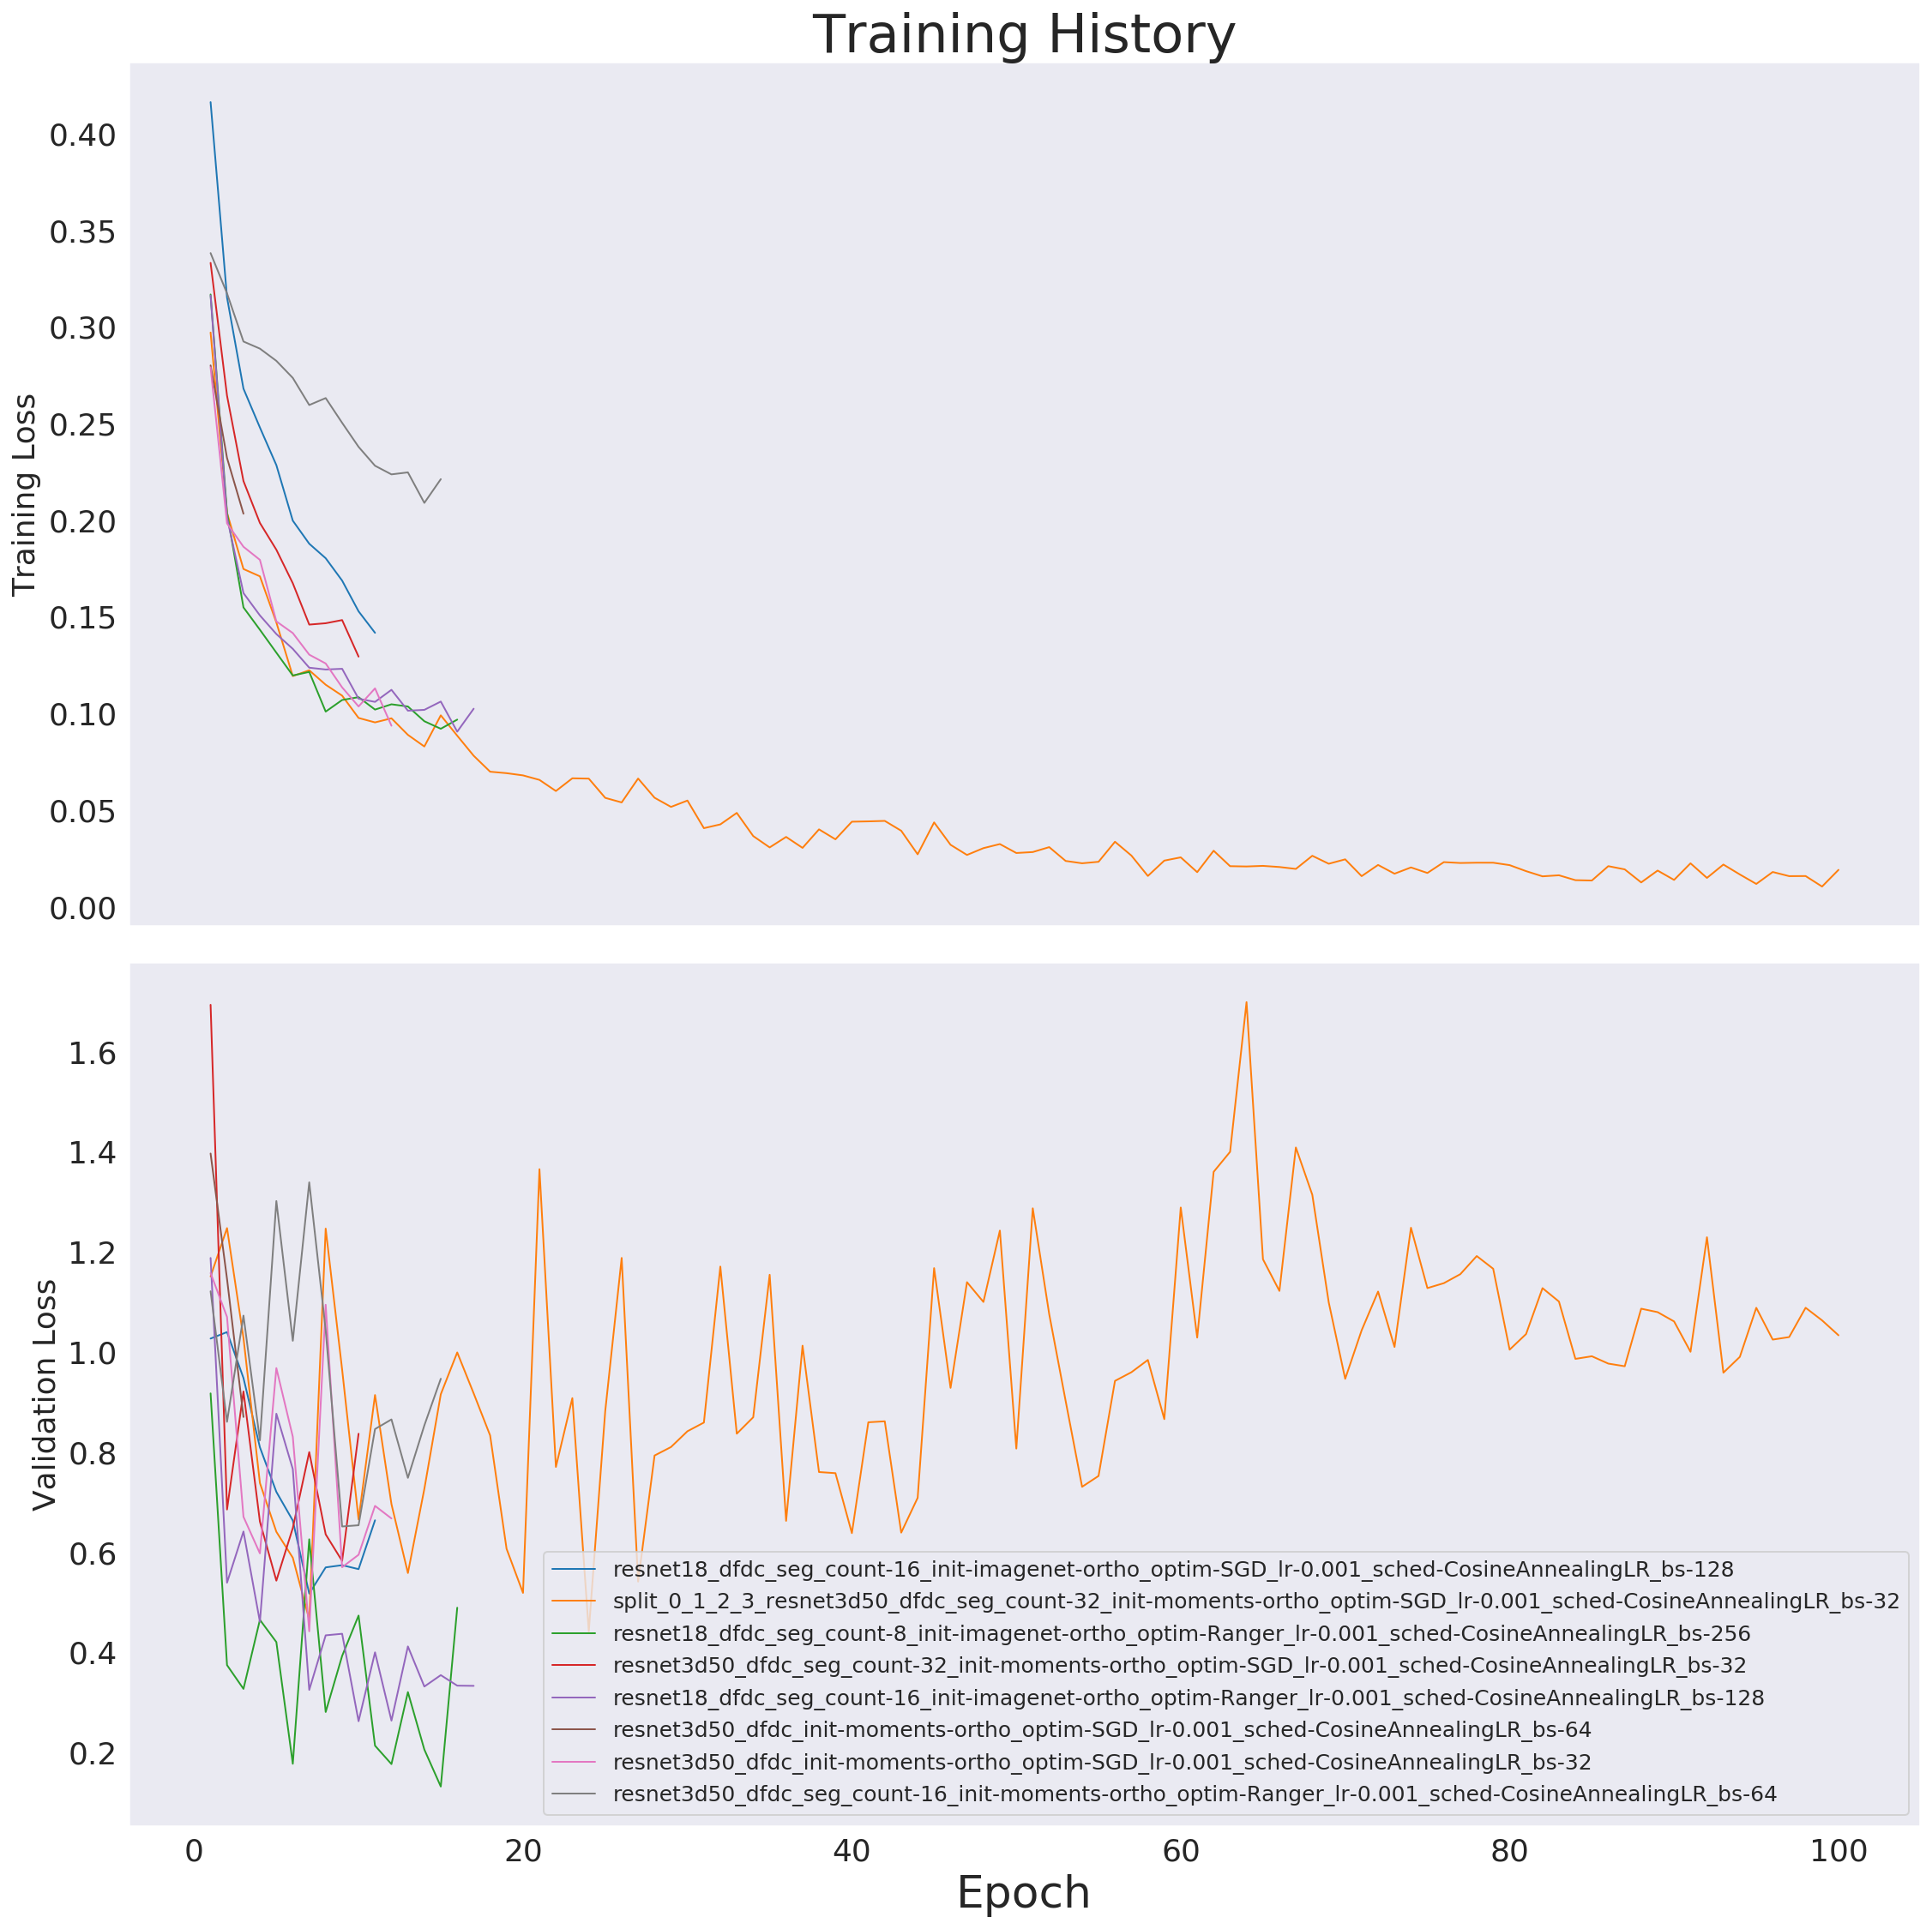

In [153]:
plot_loss_logs(logs, smoothing_amount=0.01)

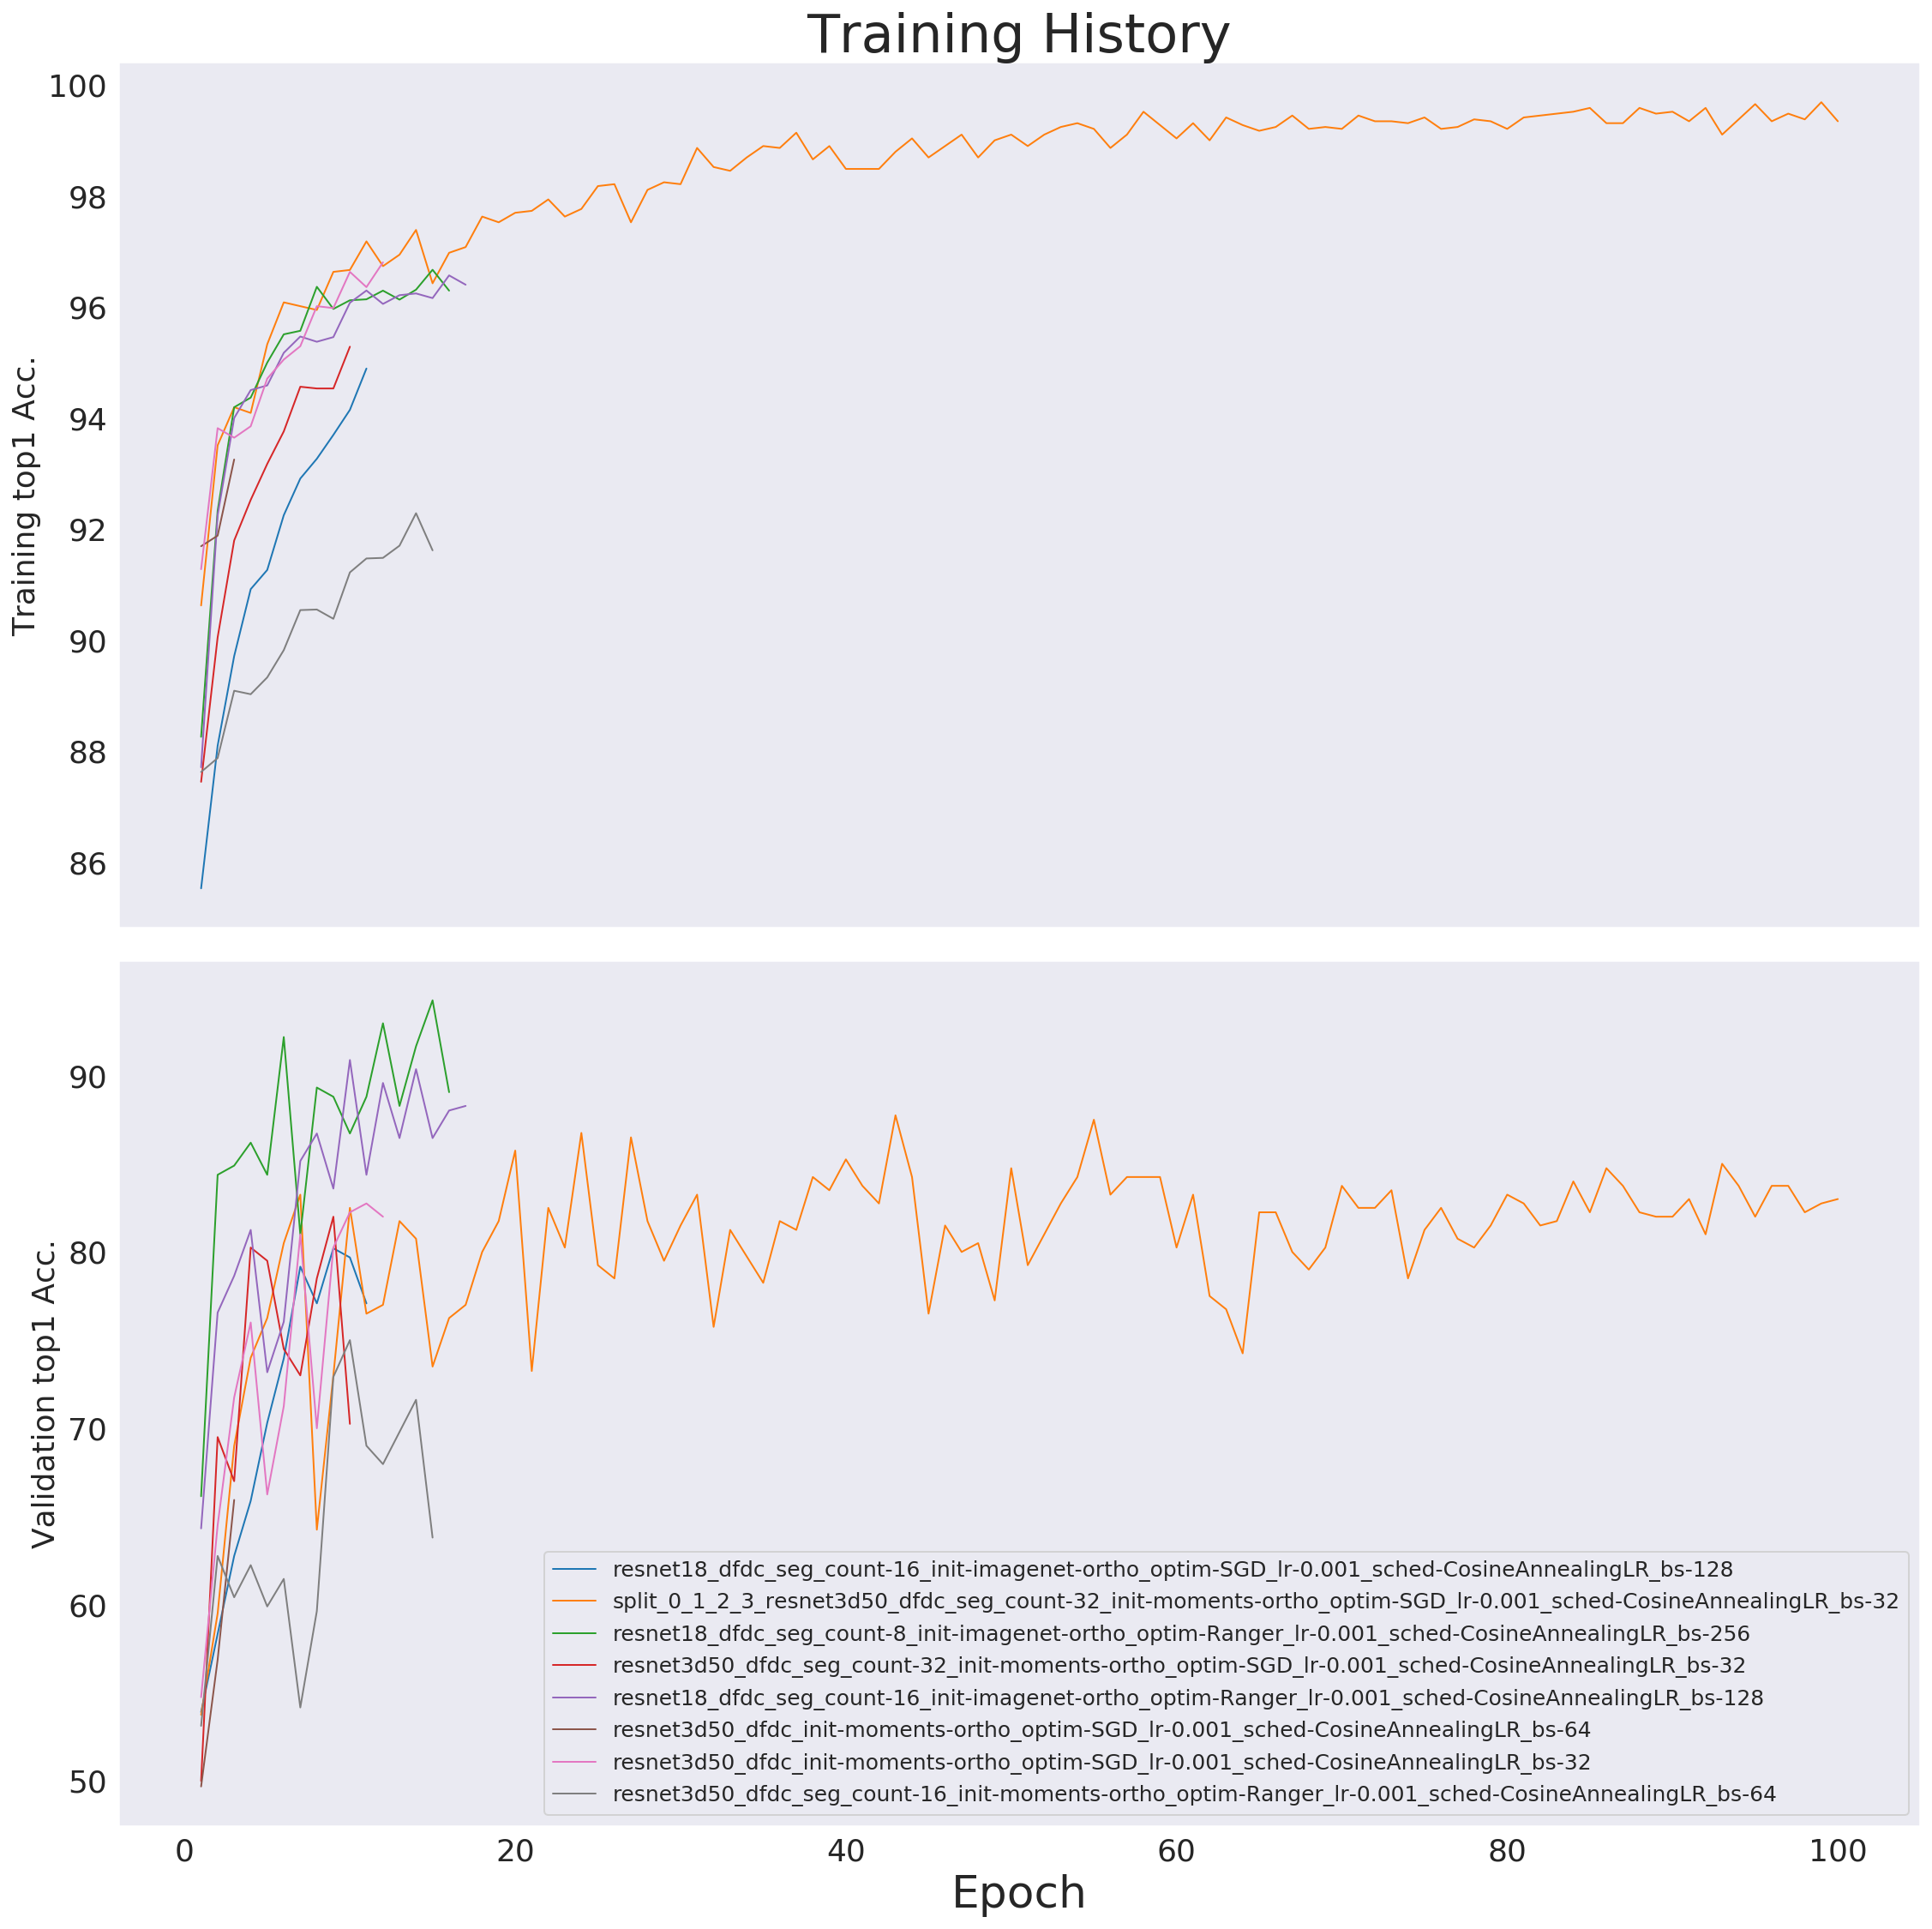

In [154]:
plot_logs(logs, smoothing_amount=0.01)